In [1]:
import numpy as np
import pygimli as pg
import pygimli.meshtools as mt
from pygimli.physics import ert
import pybert as pb

In [2]:
# Create data scheme
scheme = ert.createData(elecs=np.arange(50.1), schemeName='dd')
scheme["k"] = ert.geometricFactors(scheme)
scheme.markInvalid(np.abs(scheme["k"]) > 10000)
scheme.removeInvalid()

In [3]:
# Create geometry and mesh (as before)
world = mt.createWorld(start=[-55, 0], end=[105, -60], worldMarker=True)
circle1 = mt.createCircle(pos=[15, -10], radius=5, marker=2)
circle2 = mt.createCircle(pos=[35, -10], radius=5, marker=3)
plc = world + circle1 + circle2
for s in scheme.sensors():
    plc.createNode(s)
    plc.createNode(s + [0.0, -0.2])

mesh1 = mt.createMesh(plc, quality=34)
mesh = mesh1.createH2()

In [4]:
freq = [0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0, 50.0, 
        100.0, 200.0, 500, 1000]
fdip = pb.FDIPdata(f=freq, data=scheme)
rho = np.array([0, 100, 100, 100])  # resistivity in Ohmm
m = np.array([0, 0, 0.4, 0.3])  # chargeability in V/V
tau = np.array([0, 0.001, 0.01, 10.0])  # time constants in s
c = np.array([0, 0, 0.5, 0.5])  # relaxation exponent
fdip.simulate(mesh, rho, m, tau, c);

26/11/21 - 19:15:50 - pyGIMLi - INFO - Complex resistivity values found.
26/11/21 - 19:15:53 - pyGIMLi - INFO - Complex resistivity values found.
26/11/21 - 19:15:56 - pyGIMLi - INFO - Complex resistivity values found.
26/11/21 - 19:15:58 - pyGIMLi - INFO - Complex resistivity values found.
26/11/21 - 19:16:00 - pyGIMLi - INFO - Complex resistivity values found.
26/11/21 - 19:16:03 - pyGIMLi - INFO - Complex resistivity values found.
26/11/21 - 19:16:05 - pyGIMLi - INFO - Complex resistivity values found.
26/11/21 - 19:16:08 - pyGIMLi - INFO - Complex resistivity values found.
26/11/21 - 19:16:10 - pyGIMLi - INFO - Complex resistivity values found.
26/11/21 - 19:16:13 - pyGIMLi - INFO - Complex resistivity values found.
26/11/21 - 19:16:16 - pyGIMLi - INFO - Complex resistivity values found.
26/11/21 - 19:16:18 - pyGIMLi - INFO - Complex resistivity values found.
26/11/21 - 19:16:21 - pyGIMLi - INFO - Complex resistivity values found.


nr= [  9  57 104 150 195 239 282 324 365 405 444 482 519]


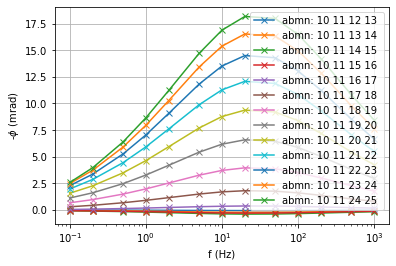

In [6]:
fdip.showDataSpectra(ab=[10, 11]);

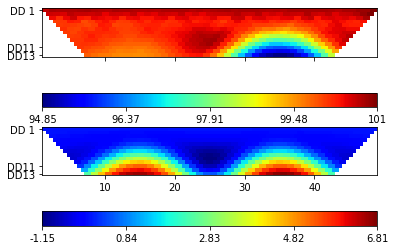

In [7]:
fdip.showSingleFrequencyData(2);

C:\Guenther.T\src\bert\bert\python\pybert\fdip\fdip.py:816: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax[0].cla()
C:\Guenther.T\src\bert\bert\python\pybert\fdip\fdip.py:816: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax[0].cla()
C:\Guenther.T\src\bert\bert\python\pybert\fdip\fdip.py:816: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax[0].cla()
C:\Guenther.T\src\bert\bert\python\pybert\fdip\fdip.py:816: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax[0].cla()
C:\Guenther.T\src\bert\bert\python\pybert\fdip\fdip.py:816: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax[0].cla()
C:\Guenther.T\src\bert\bert\python\pybert\fdip\fdip.py:816: UserWarning: Attempted to set non-positi

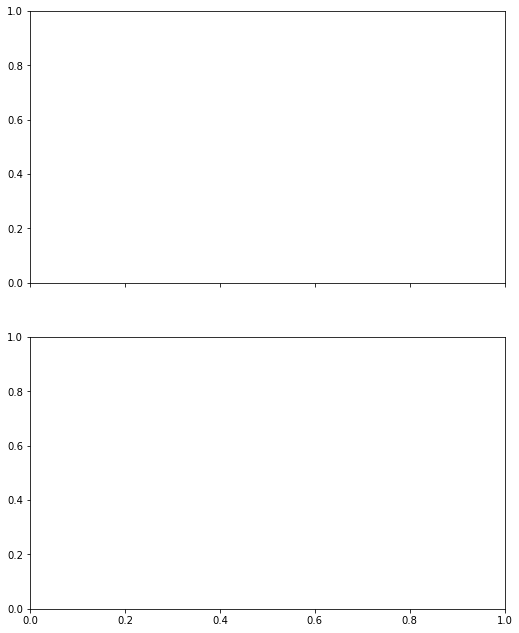

In [8]:
# fdip.generateDataPDF()
fdip.generateSpectraPDF()